In [ ]:
# for reading the kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
     

In [ ]:
# Downloading the data from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 155MB/s]
100% 1.06G/1.06G [00:12<00:00, 90.0MB/s]


In [ ]:
# Extract the zipfile

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
     

In [ ]:
import tensorflow as tf
from  tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
# Generator

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

ts = train_ds.map(process)
validation_ds = validation_ds.map(process)
     

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
## Create conv_base model
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Model Building
model=Sequential()

model.add(conv_base)   # Base model VGG16 used as top 
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# VGG16 top is false
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
#from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
# Use Data Augmentation
# Here I used ImageData Generator

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary')



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the mode 
# here I used fit_generator because ImageDataGenerator is used for Data Augumentation
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

<ipython-input-28-203589065993>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 190s 284ms/step - loss: 0.2992 - accuracy: 0.8684 - val_loss: 0.2274 - val_accuracy: 0.9042
Epoch 2/10
625/625 [==============================] - 192s 307ms/step - loss: 0.2396 - accuracy: 0.8966 - val_loss: 0.2125 - val_accuracy: 0.9098
Epoch 3/10
625/625 [==============================] - 173s 276ms/step - loss: 0.2245 - accuracy: 0.9043 - val_loss: 0.2124 - val_accuracy: 0.9094
Epoch 4/10
625/625 [==============================] - 172s 275ms/step - loss: 0.2097 - accuracy: 0.9097 - val_loss: 0.1949 - val_accuracy: 0.9170
Epoch 5/10
625/625 [==============================] - 172s 275ms/step - loss: 0.2018 - accuracy: 0.9144 - val_loss: 0.2308 - val_accuracy: 0.8988
Epoch 6/10
625/625 [==============================] - 172s 275ms/step - loss: 0.1896 - accuracy: 0.9190 - val_loss: 0.1867 - val_accuracy: 0.9230
Epoch 7/10
625/625 [==============================] - 172s 275ms/step - loss: 0.1822 - accuracy: 0.9243 - val_loss: 0.1977 -

In [30]:
import matplotlib.pyplot as plt

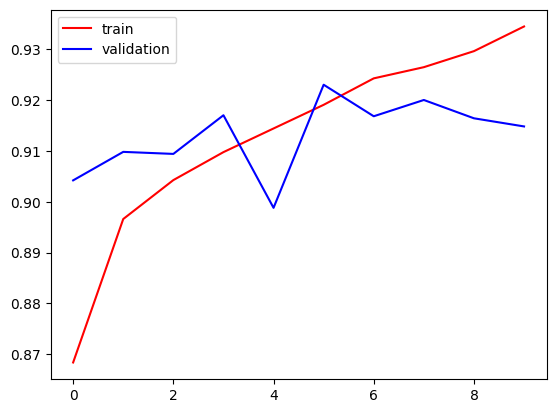

In [31]:
# Accuracuy Plot
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

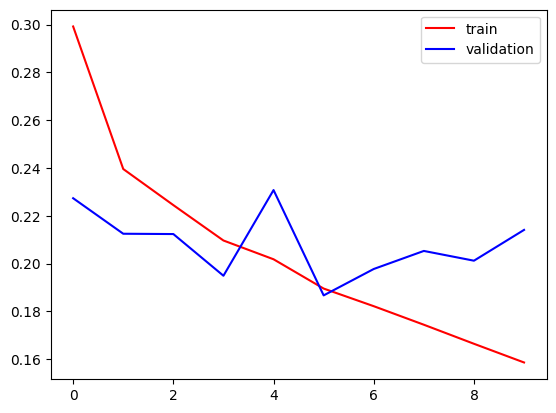

In [32]:
# Ploting the Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()